# Análise dos dados de viagem dos táxis amarelos de New York

## Em que período do ano os táxis são mais utilizados?

In [1]:
import pandas as pd
# Import para conversão dos meses de número para string
import calendar

def most_trips():
    # Lista para armazenar as viagens de taxis por mês
    trip_month = []

    # Especificação dos tipos das colunas para diminuir o consumo de memória da função read_csv()
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                'total_amount': float, 'congestion_surcharge': float}
    
    for i in range(1, 13):
        # Carregamento do dataset referente ao mês da iteração
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        
        # Adiciona o número de viagens na lista trip_month
        trip_month.append([int(str(i).zfill(2)), month['tpep_pickup_datetime'].count()])
        
        # Remove o dataset do mês a fim de liberar espaço na memória
        del month
    
    # Cria um dataset para armazenar as viagens por mês a partir da lista trip_month
    number_trips = pd.DataFrame(trip_month, columns = ['month', 'number_trips'])
    
    # Converte o número referente ao mês em nome do mês para fins estéticos
    number_trips['month'] = number_trips['month'].apply(lambda x: calendar.month_name[x])
    
    return number_trips


most_trips().head(12)

,month,number_trips
0,January,6405008
1,February,6299354
2,March,3007292
3,April,237993
4,May,348371
5,June,549760
6,July,800412
7,August,1007284
8,September,1341012
9,October,1681131


### Os taxis foram mais utilizados no mês de Janeiro de 2020, com um número de 6405008 viagens.

## Demonstre através de gráficos os bairros que possuem maior uso de táxis por mês.

- Utiliza o bairro do ponto de partida da viagem de taxi para a análise do número de viagens.
- A coluna PULocationID não possui valores nulos.

In [2]:
import pandas as pd
import seaborn as sns
import calendar

# Retorna um dataframe com os 3 bairros com mais corridas para cada mês de 2020
def top_trips_per_borough():
    
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                    'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                    'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                    'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                    'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                    'total_amount': float, 'congestion_surcharge': float}
    
    top3_months = []
    
    lookup = pd.read_csv('data/taxi_zone_lookup.csv')
    
    # O laço carrega cada arquivo .csv refente a cada mês e faz o cálculo da quantidade de viagens
    # inciadas por bairro.  
    for i in range(1,13):
        
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        month = month[['tpep_pickup_datetime', 'PULocationID']]
        lookup = lookup[['LocationID', 'Borough']]
        
        # Join para mapear o número da localidade ao seu bairro correspondente
        borough_trips = pd.merge(month, lookup, left_on = 'PULocationID', right_on = 'LocationID', how = 'left')
        del month
        
        # Contagem do número viagens por bairro, armazenando os três bairros com mais viagens em um dicionário
        top_trips = borough_trips['Borough'].value_counts(sort = True, ascending = True).nlargest(3).to_dict()
        del borough_trips
        
        # Armazena dicionários com os campos referentes ao mês, bairro e número de viagens 
        # dos 3 bairros com mais viagens em uma lista
        for key in top_trips:
            top3_months.append({'month': i, 'borough': key, 'count_trips': top_trips[key]})
        
        del top_trips
        
        # Cria um dataframe com os 3 bairros com mais corridas para cada mês
        trips = pd.DataFrame(top3_months)
        trips['month'] = trips['month'].apply(lambda x: calendar.month_name[x])
               
    return trips


top3_trips_borough = top_trips_per_borough()
top3_trips_borough

,month,borough,count_trips
0,January,Manhattan,5846105
1,January,Queens,425439
2,January,Brooklyn,71164
3,February,Manhattan,5797819
4,February,Queens,377988
5,February,Brooklyn,67973
6,March,Manhattan,2754457
7,March,Queens,182145
8,March,Brooklyn,39846
9,April,Manhattan,212996


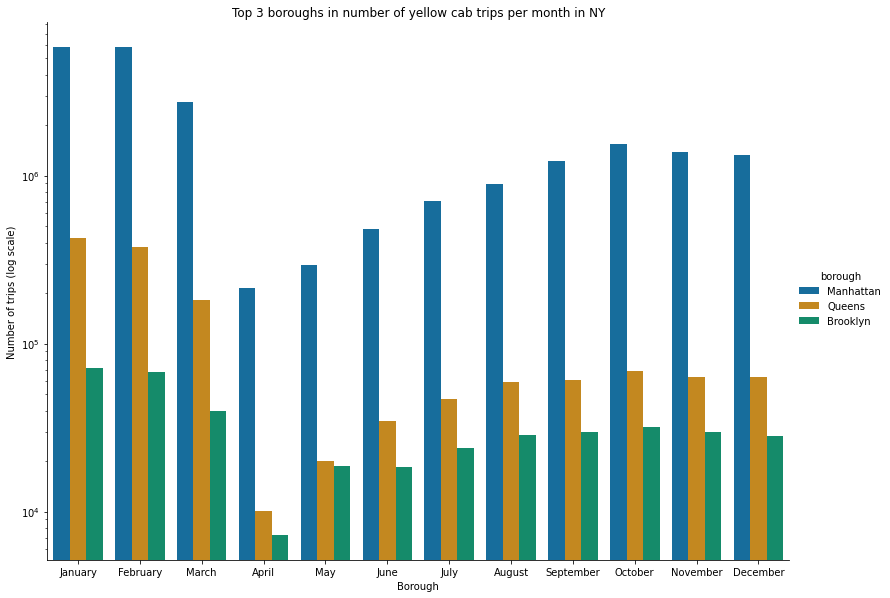

In [5]:
# Cria um gráfico de barras referente ao maior uso de táxis nos bairros de New York por mês
# Gráfico em escala logarítmica para facilitar a visualização
ax = sns.catplot(x = 'month', y = 'count_trips', hue = 'borough', log = True, \
                       kind = 'bar', data = top3_trips_borough, height = 8, \
                         aspect = 11/8, palette = 'colorblind')
ax.set(xlabel = 'Borough', ylabel = 'Number of trips (log scale)', \
       title = 'Top 3 boroughs in number of yellow cab trips per month in NY')

### Os bairros com mais viagens por mês em New York, em ordem,  são:
 - Manhattan 
 - Queens 
 - Brooklyn

## Em quais janelas de tempo as viagens contém mais passageiros?

Utilize as janelas abaixo:
 - 0h às 5h (4:59)
 - 5h às 11h
 - 11h às 14h
 - 14h às 17h
 - 17h às 21h
 - 21h às 24h

In [2]:
import pandas as pd
import datetime as dt


# Retorna a condição para filtrar o dataframe por janela de tempo
def get_window_mask(start, end, df):
    return (df['tpep_pickup_datetime'].dt.hour >= start) & (df['tpep_dropoff_datetime'].dt.hour < end)\
           & (df['tpep_pickup_datetime'].dt.hour < end)
            

# Retorna um dataframe com a quantidade de passageiros por janela de tempo em 2020
def passenger_per_time_window():
    
    column_type = {'VendorID': float, 'tpep_pickup_datetime': str, 'tpep_dropoff_datetime':  str, \
                        'passenger_count': float, 'trip_distance': float, 'RatecodeID': float, \
                        'store_and_fwd_flag': str, 'PULocationID': int, 'DOLocationID': int, \
                        'payment_type': float, 'fare_amount': float, 'extra': float, 'mta_tax': float, \
                        'tip_amount': float, 'tolls_amount': float, 'improvement_surcharge': float, \
                        'total_amount': float, 'congestion_surcharge': float}
    
    # Dataframe que armazenará a quantidade de passageiros e a janela de tempo por viagem
    passenger_windows = pd.DataFrame(columns = ['passenger_count', 'window'])
    
    for i in range(1, 13):
        # Lê o arquivo referente ao mês e mantém as colunas relevantes
        month = pd.read_csv('data/yellow_tripdata_2020-' + str(i).zfill(2) + '.csv', dtype = column_type)
        month = month[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count']]
        
        # Conversão de valores das colunas para o tipo correto
        month['passenger_count'] = month['passenger_count'].astype('Int64')
        month['tpep_pickup_datetime'] = pd.to_datetime(month['tpep_pickup_datetime'])
        month['tpep_dropoff_datetime'] = pd.to_datetime(month['tpep_pickup_datetime'])
        
        # Remove as viagens para as quais não existe quantidade de passageiros
        month = month.dropna(subset = ['passenger_count'])  
        
        # Itera no mês a partir das janelas pré-definidas
        for start, end in [(0, 5), (5, 11), (11, 14), (14, 17), (17, 21), (21,24)]:
            
            # Adiciona uma coluna com janela atual
            mask = get_window_mask(start, end, month)
            month['window'] = str(start) + '-' + str(end)
            
            # Filtra o mês a partir da janela atual 
            month_window = month[mask]            
            frames = [passenger_windows, month_window]
            
            # Concatena o mês atual no dataframe de retorno da função
            passenger_windows = pd.concat(frames)

    
    # Ajustes nos índices do dataframe e escolha das colunas relevantes
    passenger_windows = passenger_windows.reset_index()
    passenger_windows = passenger_windows.drop(columns = ['index', 'tpep_pickup_datetime', \
                                                          'tpep_dropoff_datetime'])
    
    # Cálculo do número de passageiros por janela de tempo
    passenger_windows = passenger_windows.groupby(['window']).sum()
    
    return passenger_windows.sort_values(['passenger_count'], ascending = False)

passenger_per_time_window()

,passenger_count
window,
17-21,8737307
5-11,7068636
14-17,6662982
11-14,5922367
21-24,4395166
0-5,2208766


### As janelas de tempo com mais passageiros em NY no ano de 2020, em ordem, são:

- 17h às 21h
- 5h às 11h
- 14h às 17h

## Demonstre através de gráficos os bairros que possuem maior número de passageiros por janela de tempo.

Utilize as janelas abaixo:
 - 0h às 5h (4:59)
 - 5h às 11h
 - 11h às 14h
 - 14h às 17h
 - 17h às 21h
 - 21h às 24h

## Como a distância se correlaciona com a duração das viagens? 
Demonstre através de gráficos essa correlação.

## Descreva como você faria para agendar a execução diaria e/ou mensal destes jobs.